Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреденение по десяткам точек)

Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [2]:
data = pd.read_csv('pjme.csv', index_col=[0], parse_dates=[0])

data_w = data.resample('W').mean()

In [3]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 866 entries, 2002-01-06 to 2018-08-05
Freq: W-SUN
Data columns (total 12 columns):
PJME_MW            866 non-null float64
year               866 non-null float64
month              866 non-null float64
dayofmonth         866 non-null float64
quarter            866 non-null float64
dayofyear          866 non-null float64
weekofyear         866 non-null float64
dayofweek          866 non-null float64
hour               866 non-null float64
is_holiday         866 non-null float64
is_prev_holiday    866 non-null float64
is_next_holiday    866 non-null float64
dtypes: float64(12)
memory usage: 88.0 KB


In [4]:
data_w.drop(['dayofmonth','dayofyear','dayofweek','hour','is_holiday','is_prev_holiday','is_next_holiday'],
            axis = 1,inplace = True)

In [5]:
data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 866 entries, 2002-01-06 to 2018-08-05
Freq: W-SUN
Data columns (total 5 columns):
PJME_MW       866 non-null float64
year          866 non-null float64
month         866 non-null float64
quarter       866 non-null float64
weekofyear    866 non-null float64
dtypes: float64(5)
memory usage: 40.6 KB


In [6]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_w.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)




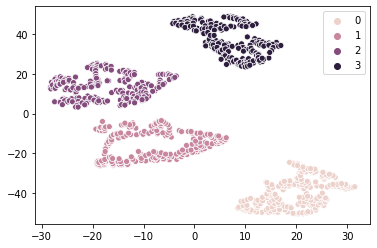

In [7]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

In [8]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  1
Число кластеров в календаре:  4


In [9]:
data_w['DBSCAN'] = X_clast
data_w.iloc[np.where(data_w['DBSCAN']==0)[0]].iloc[:10,:]

,PJME_MW,year,month,quarter,weekofyear,DBSCAN
Date,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0
2002-02-10,31150.517857,2002.0,2.000000,1.0,6.0,0
2002-02-17,30616.565476,2002.0,2.000000,1.0,7.0,0
2002-02-24,29144.130952,2002.0,2.000000,1.0,8.0,0
2002-03-03,29869.011905,2002.0,2.428571,1.0,9.0,0


In [10]:
data_w['DBSCAN'].value_counts()

1    226
2    218
0    216
3    206
Name: DBSCAN, dtype: int64

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]
Xpca.shape

(866, 2)

In [12]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [13]:
first_diff_w =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_w).astype('float32')
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

In [14]:
data_w['d_m3']=data_w['PJME_MW'].rolling(window=12).mean()

In [15]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)



/Users/nikolaj/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


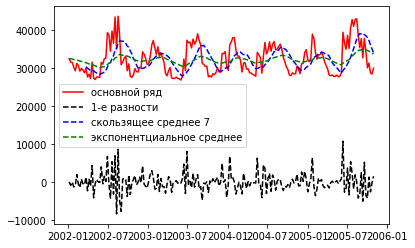

In [16]:
N100=200
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['d_m3'][:N100],'--b',label ='скользящее среднее 7')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()



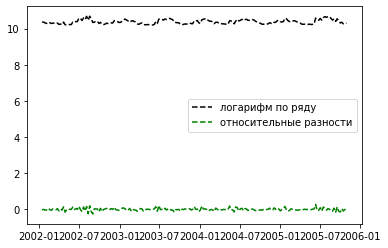

In [17]:
N100=200
plt.plot(data_w.index[1:N100],data_w['diff1_l'][1:N100],'--k',label ='логарифм по ряду')

plt.plot(data_w.index[1:N100],data_w['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

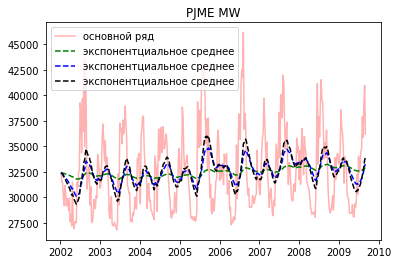

In [18]:
data_w['exp_0_01'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_0_03'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_0_04'] = exponential_smoothing(data_w['PJME_MW'], 0.04)
data_w['exp_0_06'] = exponential_smoothing(data_w['PJME_MW'], 0.06)
data_w['exp_0_07'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_0_08'] = exponential_smoothing(data_w['PJME_MW'], 0.08)

N100=400
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [19]:
data_w.iloc[:4,8]=0

In [20]:
p = 4
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

In [21]:
p = 4
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

In [22]:
data_w.head(10)

,PJME_MW,year,month,quarter,weekofyear,DBSCAN,pca1,pca2,diff1,diff1_d,...,exp_0_07,exp_0_08,t4,t3,t2,t1,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,1.0,1.0,0,-1.992055,1.747914,0.000000,0.000000,...,32392.160839,32392.160839,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,2002.0,1.000000,1.0,2.0,0,-1.992055,1.747914,0.000000,-0.028734,...,32328.826664,32319.778924,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,2002.0,1.000000,1.0,3.0,0,-1.992055,1.747914,0.000000,-0.001097,...,32267.510464,32250.427087,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,2002.0,1.000000,1.0,4.0,0,-1.992055,1.747914,0.000000,-0.043506,...,32118.691815,32081.715301,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,2002.0,1.428571,1.0,5.0,0,-1.902529,1.742705,-945.041687,-0.032368,...,31914.137554,31850.897124,32392,31487,31452,30141,0,0,0,0
2002-02-10,31150.517857,2002.0,2.000000,1.0,6.0,0,-1.783162,1.735759,1954.029785,0.062729,...,31860.684176,31794.866783,31487,31452,30141,29196,0,0,0,-945
2002-02-17,30616.565476,2002.0,2.000000,1.0,7.0,0,-1.783162,1.735759,-533.952393,-0.017440,...,31773.595867,31700.602678,31452,30141,29196,31150,0,0,-945,1954
2002-02-24,29144.130952,2002.0,2.000000,1.0,8.0,0,-1.783162,1.735759,-1472.434570,-0.050523,...,31589.533323,31496.084940,30141,29196,31150,30616,0,-945,1954,-533
2002-03-03,29869.011905,2002.0,2.428571,1.0,9.0,0,-1.693636,1.730550,724.880981,0.024269,...,31469.096823,31365.919097,29196,31150,30616,29144,-945,1954,-533,-1472


In [23]:
scl_target1=StandardScaler() 
# p = 7
h=1
target_1 = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y1 = scl_target1.fit_transform(target_1)
y1.shape

(861, 1)

In [24]:
scl_x1=StandardScaler() 

X1 = data_w.iloc[p:-h,:].values
X1 = scl_x1.fit_transform(X1.astype('float64'))
X1.shape

(861, 27)

In [25]:
scl_target4=StandardScaler() 
# p = 7
h=4
target_4 = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y4 = scl_target4.fit_transform(target_4)
y4.shape

(858, 1)

In [26]:
scl_x4=StandardScaler() 

X4 = data_w.iloc[p:-h,:].values
X4 = scl_x4.fit_transform(X4.astype('float64'))
X4.shape

(858, 27)

In [27]:
X1[:8,11]=0
X4[:8,11]=0

In [28]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test1, _ = f_regression(X1, y1.ravel())
f_test1 /= np.max(f_test1)
for i in range(X1.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test1[i],i))


F-test=0.97,  I=0
F-test=0.01,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.00,  I=6
F-test=0.01,  I=7
F-test=0.02,  I=8
F-test=0.01,  I=9
F-test=1.00,  I=10
F-test=0.01,  I=11
F-test=0.02,  I=12
F-test=0.01,  I=13
F-test=0.01,  I=14
F-test=0.02,  I=15
F-test=0.03,  I=16
F-test=0.04,  I=17
F-test=0.05,  I=18
F-test=0.07,  I=19
F-test=0.16,  I=20
F-test=0.30,  I=21
F-test=0.51,  I=22
F-test=0.04,  I=23
F-test=0.03,  I=24
F-test=0.02,  I=25
F-test=0.02,  I=26


In [29]:
f_test4, _ = f_regression(X4, y4.ravel())
f_test4 /= np.max(f_test4)
for i in range(X4.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test4[i],i))

F-test=0.98,  I=0
F-test=0.04,  I=1
F-test=0.02,  I=2
F-test=0.03,  I=3
F-test=0.02,  I=4
F-test=0.02,  I=5
F-test=0.03,  I=6
F-test=0.04,  I=7
F-test=0.18,  I=8
F-test=0.18,  I=9
F-test=1.00,  I=10
F-test=0.47,  I=11
F-test=0.13,  I=12
F-test=0.01,  I=13
F-test=0.08,  I=14
F-test=0.11,  I=15
F-test=0.13,  I=16
F-test=0.12,  I=17
F-test=0.11,  I=18
F-test=0.09,  I=19
F-test=0.00,  I=20
F-test=0.10,  I=21
F-test=0.42,  I=22
F-test=0.19,  I=23
F-test=0.23,  I=24
F-test=0.25,  I=25
F-test=0.22,  I=26


In [30]:
sfk1 =SelectKBest(f_regression, k=5)
X_new11 =sfk1.fit_transform(X1, y1.ravel())
X_new11.shape

(861, 5)

In [31]:
column_names = data_w.columns[sfk1.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 't3', 't2', 't1'], dtype='object')

In [32]:
sfk4 =SelectKBest(f_regression, k=5)
X_new41 =sfk4.fit_transform(X4, y4.ravel())
X_new41.shape
column_names = data_w.columns[sfk4.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 'd_m3', 't1', 'd2'], dtype='object')

In [33]:
sfp1=SelectPercentile(f_regression, percentile=10)
X_new12 = sfp1.fit_transform(X1, y1.ravel())
column_namesp = data_w.columns[sfp1.get_support()]
column_namesp

Index(['PJME_MW', 'diff1_l', 't1'], dtype='object')

In [34]:
sfp4=SelectPercentile(f_regression, percentile=10)
X_new42 = sfp4.fit_transform(X4, y4.ravel())
column_namesp = data_w.columns[sfp4.get_support()]
column_namesp

Index(['PJME_MW', 'diff1_l', 'd_m3'], dtype='object')

In [35]:
gr_model1 = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X1, y1.ravel())
sfm1 = SelectFromModel(gr_model1,  max_features = 5)

sfm1.fit(X1, y1.ravel())
X_new13 = sfm1.transform(X1)
X_new13.shape

(861, 4)

In [36]:
gr_model4 = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X1, y1.ravel())
sfm4 = SelectFromModel(gr_model4,  max_features = 5)

sfm4.fit(X4, y4.ravel())
X_new43 = sfm1.transform(X4)
X_new43.shape

(858, 4)

In [37]:
list_param_k1 =np.where(sfk1.get_support())[0]
list_param_p1 =np.where(sfp1.get_support())[0]
list_param_m1 =np.where(sfm1.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k1)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p1)
print('Номера признаков для выбора по модели : ',list_param_m1)

Номера признаков k лучших признаков :  [ 0 10 20 21 22]
Номера признаков лучших признаков по процентной форме:  [ 0 10 22]
Номера признаков для выбора по модели :  [ 0  6 10 11]


In [38]:
list_param_k4 =np.where(sfk4.get_support())[0]
list_param_p4 =np.where(sfp4.get_support())[0]
list_param_m4 =np.where(sfm4.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k4)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p4)
print('Номера признаков для выбора по модели : ',list_param_m4)

Номера признаков k лучших признаков :  [ 0 10 11 22 25]
Номера признаков лучших признаков по процентной форме:  [ 0 10 11]
Номера признаков для выбора по модели :  [ 2  4  6 10 11]


In [39]:
list_par=list(set(list(list_param_k1) + list(list_param_p1)+list(list_param_m1)))
X_new1 = X1[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'pca1', 'diff1_l', 'd_m3', 't3', 't2', 't1'], dtype='object')

In [40]:
list_par=list(set(list(list_param_k4) + list(list_param_p4)+list(list_param_m4)))
X_new4 = X4[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'month', 'weekofyear', 'pca1', 'diff1_l', 'd_m3', 't1',
       'd2'],
      dtype='object')

In [41]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

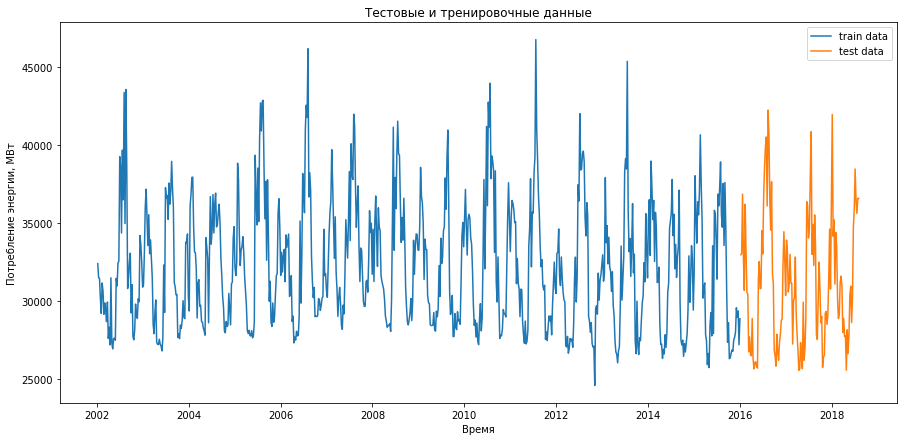

In [42]:
train, test = split_data( data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [43]:
X_train1 =X_new1[:train.shape[0],:]
y_train1 =y1[:train.shape[0],0]
X_test1 =X_new1[train.shape[0]:,:]
y_test1 =y1[train.shape[0]:,0]

In [44]:
X_train4 =X_new4[:train.shape[0],:]
y_train4 =y4[:train.shape[0],0]
X_test4 =X_new4[train.shape[0]:,:]
y_test4 =y4[train.shape[0]:,0]

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
model_g1 = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
model_g1.fit( X_train1, y_train1 ) # 
model_g4 = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
model_g4.fit( X_train4, y_train4 ) # 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [46]:
y_test_pred_g1 = model_g1.predict(X_test1)
y_test_pred_g4 = model_g4.predict(X_test4)

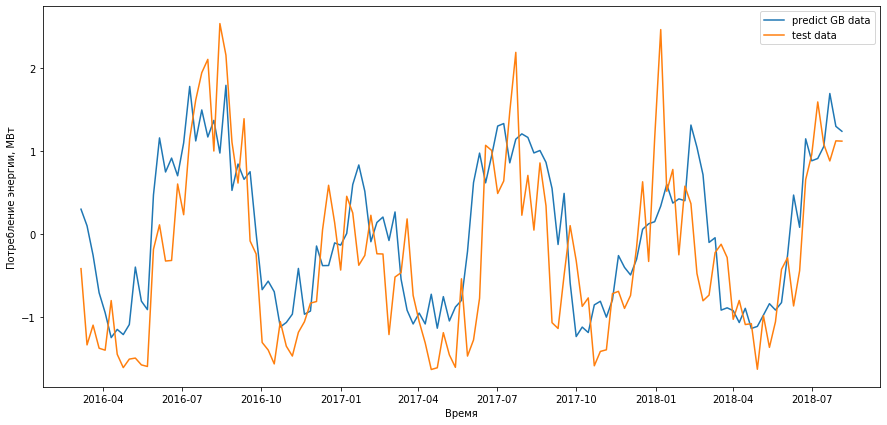

In [47]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g4, label='predict GB data' )
plt.plot(test.index[h+p:],y_test4, label='test data')

plt.legend()
plt.show()

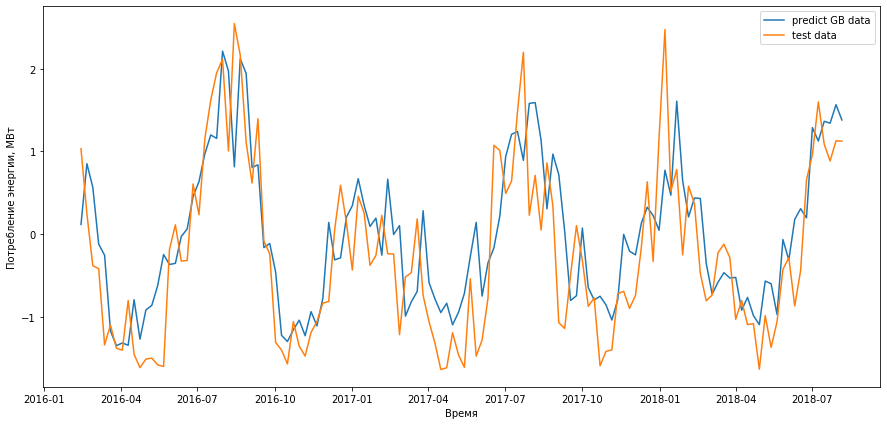

In [48]:
h = 1
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g1, label='predict GB data' )
plt.plot(test.index[h+p:],y_test1, label='test data')

plt.legend()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

er_s1 = mean_squared_error(y_true=y_test1, y_pred=y_test_pred_g1) 
er_a1 = mean_absolute_error(y_true=y_test1, y_pred=y_test_pred_g1) 
er_r21 = r2_score(y_true=y_test1, y_pred=y_test_pred_g1)

print('ошибка mse :  ', er_s1,'\nошибка mae  :  ', er_a1,'\nоценка R2 :  ', er_r21)


ошибка mse :   0.44517400020448333 
ошибка mae  :   0.5378126098352238 
оценка R2 :   0.5807089748417082


In [50]:
er_s4 = mean_squared_error(y_true=y_test4, y_pred=y_test_pred_g4) 
er_a4 = mean_absolute_error(y_true=y_test4, y_pred=y_test_pred_g4) 
er_r24 = r2_score(y_true=y_test4, y_pred=y_test_pred_g4)

print('ошибка mse :  ', er_s4,'\nошибка mae  :  ', er_a4,'\nоценка R2 :  ', er_r24)

ошибка mse :   0.5511034875971407 
ошибка mae  :   0.6085726403915567 
оценка R2 :   0.48447378654264395


In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
er_g1 = mean_absolute_percentage_error(y_true=scl_target1.inverse_transform( y_test1),y_pred = scl_target1.inverse_transform( y_test_pred_g1))

print('ошибка градиентного бустинга MAPE :  ', er_g1,'%')
er_g4 = mean_absolute_percentage_error(y_true=scl_target4.inverse_transform( y_test4),y_pred = scl_target4.inverse_transform( y_test_pred_g4))

print('ошибка градиентного бустинга MAPE :  ', er_g4,'%')

ошибка градиентного бустинга MAPE :   6.97522825669216 %
ошибка градиентного бустинга MAPE :   7.955941579418892 %


In [53]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500]}

#  randomized search
n_iter_search = 10

model_gr1 =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr1, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train1, y_train1)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.690 (std: 0.044)
Parameters: {'n_estimators': 200, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.670 (std: 0.045)
Parameters: {'n_estimators': 100, 'max_depth': 1}

Model with rank: 3
Mean validation score: 0.668 (std: 0.046)
Parameters: {'n_estimators': 100, 'max_depth': 4}



In [54]:
model_g_best1 = GradientBoostingRegressor(max_depth=1,  n_estimators=500)
model_g_best1.fit( X_train1, y_train1 ) 
y_test_pred_g1 = model_g_best1.predict(X_test1)

er_g1 = mean_absolute_percentage_error(y_true=scl_target1.inverse_transform( y_test1),y_pred = scl_target1.inverse_transform( y_test_pred_g1))
print('ошибка градиентного бустинга MAPE :  ', er_g1,'%')

ошибка градиентного бустинга MAPE :   6.594283497075488 %


In [55]:
import pickle
# save the model to disk
filename = 'final_model1.sav'
pickle.dump(model_g_best1, open(filename, 'wb'))

filename = 'final_scaler_y1.sav'
pickle.dump(scl_target1, open(filename, 'wb'))

filename = 'final_scaler_x1.sav'
pickle.dump(scl_x1, open(filename, 'wb'))

In [56]:
n_iter_search = 10

model_gr4 =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr4, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train4, y_train4)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.598 (std: 0.053)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.573 (std: 0.058)
Parameters: {'n_estimators': 500, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.563 (std: 0.053)
Parameters: {'n_estimators': 100, 'max_depth': 1}



In [57]:
model_g_best4 = GradientBoostingRegressor(max_depth=1,  n_estimators=400)
model_g_best4.fit( X_train4, y_train4 ) 
y_test_pred_g4 = model_g_best4.predict(X_test4)

er_g4 = mean_absolute_percentage_error(y_true=scl_target4.inverse_transform( y_test4),y_pred = scl_target4.inverse_transform( y_test_pred_g4))
print('ошибка градиентного бустинга MAPE :  ', er_g4,'%')

ошибка градиентного бустинга MAPE :   7.894892286005235 %


In [58]:
filename = 'final_model4.sav'
pickle.dump(model_g_best4, open(filename, 'wb'))

filename = 'final_scaler_y4.sav'
pickle.dump(scl_target4, open(filename, 'wb'))

filename = 'final_scaler_x4.sav'
pickle.dump(scl_x4, open(filename, 'wb'))

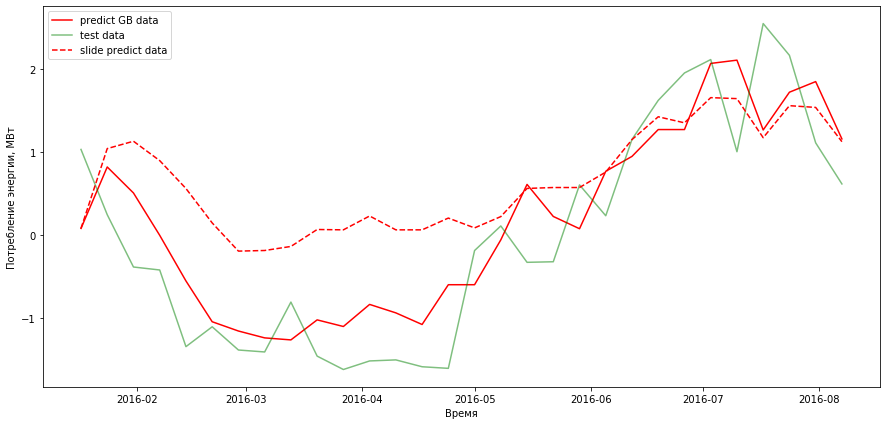

In [66]:
X_test_100 = X_test1.copy()
#['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
X_test_100 = X_test1.copy()
y_test_100 = y_test_pred_g1.copy()
N10 = 30
for i in range(N10):
    y_test_100[i] = model_g_best1.predict(X_test_100[i,:].reshape((1,7)))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target1.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x1.mean_[0])/scl_x1.scale_[0]
    #строим 'exp_0_07', 'exp_0_08'
    X_test_100[i+1,6] = X_test_100[i,6]*(1-0.08)+ 0.08 * X_test_100[i+1,0] 
    X_test_100[i+1,5] = X_test_100[i,5]*(1-0.07)+ 0.07 * X_test_100[i+1,0] 
    #строим 'd_w7' - признак под номером 3
    if i>p:
        X_test_100[i+1,3] = np.mean(X_test_100[i+1-p:i+1,0]) 
    #строим 'diff1_l' - признак под номером 4
    # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x1.mean_[15])*scl_x1.scale_[15]
    #устанавливаем новое значение для 4
    X_test_100[i+1,4] = xy_i 
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g1[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test1[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

In [72]:
N = [10,20,30,40,50,60,70,80,90,100]
k=0
for i in N:
    er_g = mean_absolute_percentage_error(y_true=scl_target1.inverse_transform( y_test1[k:i]),y_pred = scl_target1.inverse_transform( y_test_100[k:i]))
    k+=10
    print (k)
    print('ошибка градиентного бустинга :  ', er_g,'%')

10
ошибка градиентного бустинга MAPE :   17.208864329733892 %
20
ошибка градиентного бустинга MAPE :   15.86324409145038 %
30
ошибка градиентного бустинга MAPE :   5.541896795642116 %
40
ошибка градиентного бустинга MAPE :   5.6983558063587365 %
50
ошибка градиентного бустинга MAPE :   5.452282885669396 %
60
ошибка градиентного бустинга MAPE :   6.371033005375362 %
70
ошибка градиентного бустинга MAPE :   7.244118614776787 %
80
ошибка градиентного бустинга MAPE :   8.788807062826793 %
90
ошибка градиентного бустинга MAPE :   8.612841903500975 %
100
ошибка градиентного бустинга MAPE :   7.555980695285439 %


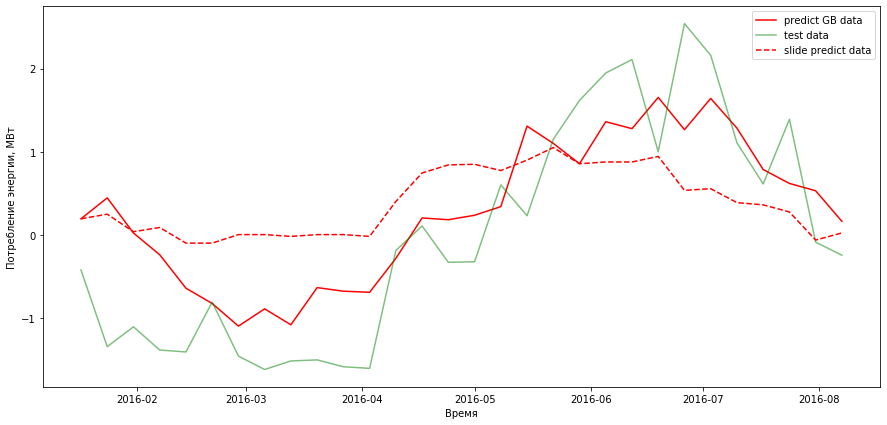

In [73]:
X_test_100 = X_test4.copy()
#['PJME_MW', 'dayofweek', 'pca2', 'd_w7', 'diff1_l', 'exp_0_07', 'exp_0_08']
X_test_100 = X_test4.copy()
y_test_100 = y_test_pred_g4.copy()
N10 = 30
for i in range(N10):
    y_test_100[i] = model_g_best4.predict(X_test_100[i,:].reshape((1,8)))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i4=scl_target4.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i4-scl_x4.mean_[0])/scl_x4.scale_[0]
    #строим 'exp_0_07', 'exp_0_08'
    X_test_100[i+1,6] = X_test_100[i,6]*(1-0.08)+ 0.08 * X_test_100[i+1,0] 
    X_test_100[i+1,5] = X_test_100[i,5]*(1-0.07)+ 0.07 * X_test_100[i+1,0] 
    #строим 'd_w7' - признак под номером 3
    if i>p:
        X_test_100[i+1,3] = np.mean(X_test_100[i+1-p:i+1,0]) 
    #строим 'diff1_l' - признак под номером 4
    # строим логарифм по значению ряда и скалируем признак по схеме 15-го признака из основного списка
    xy_i=(np.log((y_i4))-scl_x4.mean_[15])*scl_x4.scale_[15]
    #устанавливаем новое значение для 4
    X_test_100[i+1,4] = xy_i 
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g4[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test4[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

In [74]:
k=0
for i in N:
    er_g = mean_absolute_percentage_error(y_true=scl_target4.inverse_transform( y_test4[k:i]),y_pred = scl_target4.inverse_transform( y_test_100[k:i]))
    k+=10
    print (k)
    print('ошибка градиентного бустинга :  ', er_g,'%')

10
ошибка градиентного бустинга :   19.34236721891375 %
20
ошибка градиентного бустинга :   11.401138515125323 %
30
ошибка градиентного бустинга :   8.44779255914401 %
40
ошибка градиентного бустинга :   5.776993311056729 %
50
ошибка градиентного бустинга :   6.72441193327956 %
60
ошибка градиентного бустинга :   10.44784895008051 %
70
ошибка градиентного бустинга :   9.61387357257201 %
80
ошибка градиентного бустинга :   10.924915791134712 %
90
ошибка градиентного бустинга :   9.406178510356938 %
100
ошибка градиентного бустинга :   7.379527137936161 %


До определьнного момента ошибка уменьшалась, потом начала расти. Я не уверен, что это правильное решение, если посоветуете, какую нибудь информативную литературу , буду очень признатлен